In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
import re

In [4]:
import random
random.seed(111)

In [19]:
test_dir = '/content/gdrive/MyDrive/Audio_Classification-MLSP-test'

In [4]:

train_dir = '/content/gdrive/MyDrive/train'

In [5]:

df = pd.read_csv('/content/gdrive/MyDrive/annotations.csv')

In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [20]:
X_test=np.zeros((201,128,2500,1))
# Y_test=np.zeros((1000,10))

i=0
for filename in os.listdir(test_dir):
    file=f"/content/gdrive/MyDrive/Audio_Classification-MLSP-test/{filename}"
    x=np.load(file)
#     print(filename)
    # l=list(df.label[df.fname==filename])
    # l=l[0]
    if x.shape[2]<2500:
        X_test[i,:,0:x.shape[2],0]=x[0,:,:]
        X_test[i,:,x.shape[2]:2500,0]=0
    else:
        X_test[i,:,0:2500,0]=x[0,:,0:2500]
    # Y_train[i,classes[l]]=1
    i=i+1
    
# for i in range(len(df)):
#     file = load_npy_to_any(train_dir,df['fname'][i])
#     l

In [21]:
X_test.shape

(201, 128, 2500, 1)

In [7]:
# df=pd.read_csv("annotations.csv")
X_train=np.zeros((1000,128,2500,1))
Y_train=np.zeros((1000,10))
classes={
    "Bark":0,
    "Meow":1,
    "Siren":2,
    "Shatter":3,
    "Knock":4,
    "Crying_and_sobbing":5,
    "Microwave_oven":6,
    "Vehicle_horn_and_car_horn_and_honking":7,
    "Doorbell":8,
    "Walk_and_footsteps":9
}

In [36]:
df['class'] = ''
for i in range(len(df)):
  df['class'][i] = classes[df['label'][i]]

In [8]:
i=0
for filename in os.listdir(train_dir):
    file=f"/content/gdrive/MyDrive/train/{filename}"
    x=np.load(file)
#     print(filename)
    l=list(df.label[df.fname==filename])
    l=l[0]
    if x.shape[2]<2500:
        X_train[i,:,0:x.shape[2],0]=x[0,:,:]
        X_train[i,:,x.shape[2]:2500,0]=0
    else:
        X_train[i,:,0:2500,0]=x[0,:,0:2500]
    Y_train[i,classes[l]]=1
    i=i+1
    
# for i in range(len(df)):
#     file = load_npy_to_any(train_dir,df['fname'][i])
#     l

In [ ]:
len(X_train)

1000

#Support Vector Machine

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=0, shuffle = True, stratify = Y_train)

In [10]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [11]:
y_train.shape

(800, 10)

In [12]:
y_train = np.argmax(y_train, axis = 1)

In [13]:
y_train

array([8, 2, 8, 4, 7, 6, 7, 2, 0, 0, 2, 1, 0, 5, 7, 8, 7, 3, 9, 0, 6, 7,
       1, 9, 8, 4, 7, 4, 4, 7, 8, 8, 7, 1, 0, 6, 6, 1, 2, 3, 1, 0, 0, 4,
       4, 5, 5, 6, 5, 8, 3, 5, 5, 0, 1, 9, 3, 4, 6, 7, 4, 3, 2, 8, 7, 7,
       9, 5, 2, 8, 0, 6, 3, 5, 9, 6, 7, 7, 9, 5, 8, 3, 4, 6, 4, 7, 6, 3,
       1, 5, 5, 9, 2, 3, 9, 9, 7, 8, 7, 7, 9, 4, 0, 9, 5, 5, 5, 3, 8, 6,
       8, 6, 9, 9, 0, 0, 4, 3, 6, 0, 0, 2, 7, 8, 7, 5, 4, 9, 7, 2, 0, 7,
       3, 0, 0, 3, 8, 4, 8, 1, 6, 4, 6, 5, 3, 1, 7, 1, 8, 4, 9, 6, 1, 5,
       5, 3, 5, 4, 0, 6, 6, 2, 3, 9, 9, 4, 7, 4, 0, 1, 1, 0, 5, 8, 3, 7,
       1, 7, 3, 5, 8, 3, 6, 6, 2, 2, 8, 7, 5, 9, 8, 2, 9, 7, 9, 4, 8, 0,
       8, 9, 4, 1, 2, 8, 1, 1, 1, 8, 2, 8, 7, 5, 0, 4, 2, 9, 8, 4, 8, 0,
       2, 8, 5, 6, 4, 7, 3, 7, 6, 9, 2, 8, 1, 9, 0, 2, 3, 6, 3, 2, 5, 9,
       8, 5, 8, 3, 9, 0, 3, 3, 0, 6, 9, 7, 0, 2, 5, 5, 0, 8, 4, 8, 1, 4,
       6, 7, 1, 5, 3, 4, 3, 5, 0, 6, 7, 3, 3, 2, 7, 9, 7, 2, 7, 3, 8, 4,
       3, 3, 2, 6, 6, 6, 9, 1, 5, 3, 1, 6, 2, 8, 8,

In [16]:
X_train.shape
X_train = X_train.reshape(800,320000)
X_test = X_test.reshape(200,320000)

In [17]:

y_test = np.argmax(y_test, axis = 1)

In [18]:
print('fitting...')
clf = SVC(C=20.0, gamma=0.00001)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

fitting...
acc=0.735


In [ ]:
test_data = 

# Model 2 (Treating data as spectrograms)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2,random_state=0, shuffle = True)

In [25]:
import librosa
import numpy as np
import scipy
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras.layers import (Convolution1D, Dense, Dropout, GlobalAveragePooling1D, 
                          GlobalMaxPool1D, Input, MaxPool1D, concatenate, SpatialDropout2D, AveragePooling2D)
# from keras.utils import Sequence, to_categorical
from tensorflow.keras.utils import Sequence, to_categorical

from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation)
# from keras.utils import Sequence, to_categorical
from keras import backend as K
# tf.keras.layers.Dropout

In [ ]:
import tensorflow as tf

In [48]:
def get_2d_conv_model():
    
    nclass = 10
    
    inp = Input(shape=(128,2500,1))
    x = Convolution2D(8, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    x = Convolution2D(16, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    # x = Convolution2D(64, (3,3), padding="same")(x)
    # # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)
    
    # x = Convolution2D(128, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)

    # x = Convolution2D(256, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)

    # x = Convolution2D(512, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)

    x = Flatten()(x)
    x = Dense(32)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)
    # x = Dense(256)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Adam(lr = 0.0001)
    # opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, nesterov=False, name="SGD")

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    # model.compile(optimizer='adam',
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              # metrics=['accuracy'])
    return model

In [ ]:
X_train.shape

(800, 128, 2500, 1)

In [ ]:
y_train.shape

(800, 10)

In [ ]:
X_test.shape

(200, 128, 2500, 1)

In [49]:
checkpoint = ModelCheckpoint('model_spec_adam_small.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks_list = [checkpoint, early]
model = get_2d_conv_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks_list, 
                        batch_size=32, epochs=40)
model.load_weights('model_spec_adam_small.h5')

Epoch 1/40
25/25 [==============================] - ETA: 0s - loss: 2.1645 - acc: 0.2425
Epoch 1: val_loss improved from inf to 2.06335, saving model to model_spec_adam_small.h5
25/25 [==============================] - 121s 5s/step - loss: 2.1645 - acc: 0.2425 - val_loss: 2.0633 - val_acc: 0.3500
Epoch 2/40
25/25 [==============================] - ETA: 0s - loss: 1.8144 - acc: 0.3950
Epoch 2: val_loss improved from 2.06335 to 1.90904, saving model to model_spec_adam_small.h5
25/25 [==============================] - 120s 5s/step - loss: 1.8144 - acc: 0.3950 - val_loss: 1.9090 - val_acc: 0.4750
Epoch 3/40
25/25 [==============================] - ETA: 0s - loss: 1.6132 - acc: 0.4863
Epoch 3: val_loss improved from 1.90904 to 1.75428, saving model to model_spec_adam_small.h5
25/25 [==============================] - 118s 5s/step - loss: 1.6132 - acc: 0.4863 - val_loss: 1.7543 - val_acc: 0.6100
Epoch 4/40
25/25 [==============================] - ETA: 0s - loss: 1.4415 - acc: 0.5213
Epoch 4: 

In [ ]:
checkpoint = ModelCheckpoint('model_spec_adam.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks_list = [checkpoint, early]
model = get_2d_conv_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks_list, 
                        batch_size=32, epochs=40)
model.load_weights('model_spec_adam.h5')

ValueError: ignored

In [ ]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

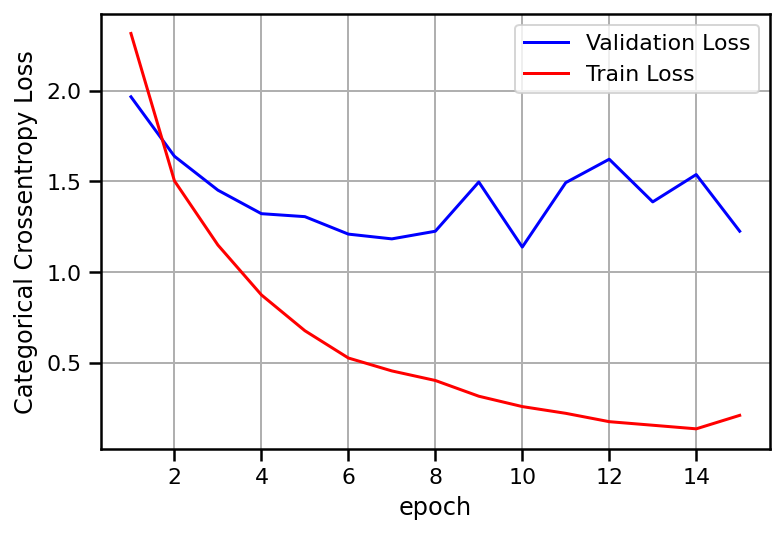

In [ ]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,15+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
df

,fname,label,split,class
0,02639.npy,Bark,train,0
1,1580.npy,Bark,train,0
2,24030.npy,Bark,train,0
3,316499.npy,Bark,train,0
4,413718.npy,Bark,train,0
...,...,...,...,...
995,9956925.npy,Walk_and_footsteps,train,9
996,99611454.npy,Walk_and_footsteps,train,9
997,9979729.npy,Walk_and_footsteps,train,9
998,99818869.npy,Walk_and_footsteps,train,9


In [ ]:
x = np.load(train_dir + '/' +  '1580.npy')

In [ ]:
x = x.reshape(x.shape[1],x.shape[2])

In [ ]:
import librosa.display

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)

img = librosa.display.specshow(x, ax = ax)
fig.savefig('out.png')
# plt.show()

In [ ]:
import skimage.io

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

img = scale_minmax(x, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. make black==more energy

    # save as PNG
skimage.io.imsave('a.png', img)

In [ ]:
img

#Model 3, contains several models (Converting all spectrograms to images and then training them with cnn)

In [35]:
import librosa.display
for file in os.listdir(train_dir):
  x = np.load(train_dir + '/' + file)
  x = x.reshape(x.shape[1], x.shape[2])
  fig = plt.Figure()
  # canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)

  img = librosa.display.specshow(x, ax = ax)
  name = '/content/image/' + str(file.split('.')[0]) + '.jpg'
  fig.savefig(name)

In [22]:
import librosa.display
for file in os.listdir(test_dir):
  x = np.load(test_dir + '/' + file)
  x = x.reshape(x.shape[1], x.shape[2])
  fig = plt.Figure()
  # canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)

  img = librosa.display.specshow(x, ax = ax)
  name = '/content/images/' + str(file.split('.')[0]) + '.jpg'
  fig.savefig(name)

In [36]:
df['class'] = ''
for i in range(len(df)):
  df['class'][i] = classes[df['label'][i]]

In [37]:
df

,fname,label,split,class
0,02639.npy,Bark,train,0
1,1580.npy,Bark,train,0
2,24030.npy,Bark,train,0
3,316499.npy,Bark,train,0
4,413718.npy,Bark,train,0
...,...,...,...,...
995,9956925.npy,Walk_and_footsteps,train,9
996,99611454.npy,Walk_and_footsteps,train,9
997,9979729.npy,Walk_and_footsteps,train,9
998,99818869.npy,Walk_and_footsteps,train,9


In [38]:
for i in range(len(df)):
  df['fname'][i] = df['fname'][i].split('.')[0] + '.jpg'

In [39]:
df

,fname,label,split,class
0,02639.jpg,Bark,train,0
1,1580.jpg,Bark,train,0
2,24030.jpg,Bark,train,0
3,316499.jpg,Bark,train,0
4,413718.jpg,Bark,train,0
...,...,...,...,...
995,9956925.jpg,Walk_and_footsteps,train,9
996,99611454.jpg,Walk_and_footsteps,train,9
997,9979729.jpg,Walk_and_footsteps,train,9
998,99818869.jpg,Walk_and_footsteps,train,9


In [40]:
all_images_path=df
# all_images_path.head()
X_train, X_val, y_train, y_val = train_test_split( all_images_path["fname"], all_images_path["class"], test_size=0.4, random_state=40,shuffle=True,stratify=all_images_path["class"])
X_val, X_test, y_val, y_test = train_test_split( X_val, y_val, test_size=0.5, random_state=40,shuffle=True,stratify=y_val)

In [58]:
y_train

770    7
283    2
720    7
697    6
781    7
      ..
705    7
995    9
366    3
409    4
841    8
Name: class, Length: 600, dtype: object

In [41]:
import string

In [24]:
root_path = '/content'
def make_doc_dirs(path): 
    if not os.path.exists(path):
        os.mkdir(path)
    for label in range(10): 
        if not os.path.exists(path + string.ascii_lowercase[label]):
            os.mkdir(path + string.ascii_lowercase[label])

In [42]:
make_doc_dirs('/content/training/')

In [43]:
make_doc_dirs('/content/testing/')
make_doc_dirs('/content/validation/')

In [45]:
import shutil

# src_path = r"E:\demos\files\report\profit.txt"
# dst_path = r"/kaggle/working/training/\profit.txt"
for path, label in zip(X_train,y_train):
    shutil.copy(r"/content/image/"+path, r"/content/training/"+ string.ascii_lowercase[label]+"/"+path)
for path, label in zip(X_test,y_test):
    shutil.copy(r"/content/image/"+path, r"/content/testing/"+string.ascii_lowercase[label]+"/"+path)
for path, label in zip(X_val,y_val):
    shutil.copy(r"/content/image/"+path, r"/content/validation/"+string.ascii_lowercase[label]+"/" + path)

In [46]:
train=[]
for path,label in zip(X_train,y_train):
    train.append("/content/training/"+string.ascii_lowercase[label]+"/"+str(path))
test=[]
for path,label in zip(X_test,y_test):
    test.append("/content/testing/"+string.ascii_lowercase[label]+"/"+str(path))
cv=[]
for path,label in zip(X_val,y_val):
    cv.append("/content/validation/"+string.ascii_lowercase[label]+"/"+str(path))

In [29]:
from keras.preprocessing.image import ImageDataGenerator


In [47]:
train_datagen = ImageDataGenerator(brightness_range=[0.5,1.5],zoom_range = 0.5,
rescale = 1./255)
test_datagen = ImageDataGenerator(
rescale = 1./255)
cv_datagen = ImageDataGenerator(
rescale = 1./255)

In [33]:
test_it = test_datagen.flow_from_directory('/content/images/',batch_size=201,target_size=(256, 256), shuffle = False)

Found 0 images belonging to 0 classes.


In [48]:
train_it = train_datagen.flow_from_directory('/content/training/',batch_size=32,target_size=(256, 256))
# load and iterate validation dataset
test_it = test_datagen.flow_from_directory('/content/testing/',batch_size=32,target_size=(256, 256))
# load and iterate test dataset
cv_it = cv_datagen.flow_from_directory('/content/validation/', batch_size=32,target_size=(256, 256))

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [54]:
class1 = train_it.class_indices

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 256,256
batch_size = 16
epochs = 50


# model =keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3),)

In [ ]:
def get_2d_conv_model():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    # x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)
    
    # x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Nadam(lr = 0.0001)

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
checkpoint = ModelCheckpoint('model_image.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks_list = [checkpoint, early]
model = get_2d_conv_model()
# history = model.fit(train_it, test_it, validation_data=(cv_it, y_test), callbacks=callbacks_list, 
#                         batch_size=32, epochs=15)
# model.load_weights('best_model_batch.h5')

In [ ]:
history = model.fit_generator(
train_it,
steps_per_epoch =600/32,
epochs=60,    
validation_data=cv_it,
validation_steps=200/32,
callbacks=callbacks_list)

Epoch 1/60
19/18 [==============================] - ETA: 0s - loss: 2.2964 - acc: 0.1300
Epoch 1: val_loss improved from inf to 2.26499, saving model to model_image.h5
18/18 [==============================] - 50s 3s/step - loss: 2.2964 - acc: 0.1300 - val_loss: 2.2650 - val_acc: 0.1650
Epoch 2/60
19/18 [==============================] - ETA: 0s - loss: 2.1897 - acc: 0.2033
Epoch 2: val_loss improved from 2.26499 to 2.08298, saving model to model_image.h5
18/18 [==============================] - 50s 3s/step - loss: 2.1897 - acc: 0.2033 - val_loss: 2.0830 - val_acc: 0.2750
Epoch 3/60
19/18 [==============================] - ETA: 0s - loss: 2.0996 - acc: 0.2367
Epoch 3: val_loss improved from 2.08298 to 1.89963, saving model to model_image.h5
18/18 [==============================] - 50s 3s/step - loss: 2.0996 - acc: 0.2367 - val_loss: 1.8996 - val_acc: 0.3450
Epoch 4/60
19/18 [==============================] - ETA: 0s - loss: 1.9825 - acc: 0.3283
Epoch 4: val_loss improved from 1.89963 to

In [ ]:
score=model.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
score[1]*100

72.50000238418579

In [ ]:
score=model.evaluate_generator(train_it,steps=600/32,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
score[1]*100

96.42857313156128

In [ ]:
def step_decay(epoch):
	initial_lrate = 0.001
	max_iter=50
	lrate = initial_lrate*(1-epoch/max_iter)**0.5
	return lrate

In [ ]:
def get_2d_conv_model():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    # x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)
    
    # x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Nadam(learning_rate=0.01)

    model.compile(loss = "categorical_crossentropy", optimizer =opt, metrics=["accuracy"])
    return model

In [ ]:
checkpoint = ModelCheckpoint('Nadam_batchnorm.h5', monitor='val_loss', verbose=1, save_best_only=True)
from keras.callbacks import ReduceLROnPlateau

# reduce_lr = LearningRateScheduler(step_decay)
# mcp_save = ModelCheckpoint('model_1.hdf5', save_best_only=True, monitor='val_acc', mode='max')
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks_list = [checkpoint, early]
model = get_2d_conv_model()
# history = model.fit(train_it, test_it, validation_data=(cv_it, y_test), callbacks=callbacks_list, 
#                         batch_size=32, epochs=15)
# model.load_weights('best_model_batch.h5')

In [ ]:
history = model.fit_generator(
train_it,
steps_per_epoch =600/32,
epochs=50,    
validation_data=cv_it,
validation_steps=200/32,
callbacks=callbacks_list)

Epoch 1/50
19/18 [==============================] - ETA: 0s - loss: 3.8910 - accuracy: 0.0817
Epoch 1: val_loss improved from inf to 2.30283, saving model to Nadam_batchnorm.h5
18/18 [==============================] - 51s 3s/step - loss: 3.8910 - accuracy: 0.0817 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/50
19/18 [==============================] - ETA: 0s - loss: 2.3052 - accuracy: 0.0883
Epoch 2: val_loss improved from 2.30283 to 2.30273, saving model to Nadam_batchnorm.h5
18/18 [==============================] - 49s 3s/step - loss: 2.3052 - accuracy: 0.0883 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/50
19/18 [==============================] - ETA: 0s - loss: 2.3054 - accuracy: 0.0933
Epoch 3: val_loss improved from 2.30273 to 2.30268, saving model to Nadam_batchnorm.h5
18/18 [==============================] - 52s 3s/step - loss: 2.3054 - accuracy: 0.0933 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/50
 1/18 [>.............................] - ETA: 53s - loss: 2.300

KeyboardInterrupt: ignored

In [88]:
model.load_weights('Nadam_batchnorm.h5')

In [89]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [93]:
xtest, ytest = test_it.next()

In [94]:
ypred = m.predict(xtest)

In [95]:
ytest = np.argmax(ytest, axis = 1)
ypred = np.argmax(ypred, axis = 1)

In [ ]:
ytest = np.array(ytest)

In [ ]:
ypred = np.array(ypred)

In [96]:
cm = confusion_matrix(ytest, ypred)

In [97]:
import itertools

In [98]:
# categorical_test_labels = pd.DataFrame(ytest).idxmax(axis=1)
# categorical_preds = pd.DataFrame(ypred).idxmax(axis=1)
# confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
#  ‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize= (15,15))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

In [99]:
label = list(classes.keys())

In [ ]:
label

['Bark',
 'Meow',
 'Siren',
 'Shatter',
 'Knock',
 'Crying_and_sobbing',
 'Microwave_oven',
 'Vehicle_horn_and_car_horn_and_honking',
 'Doorbell',
 'Walk_and_footsteps']

Normalized confusion matrix


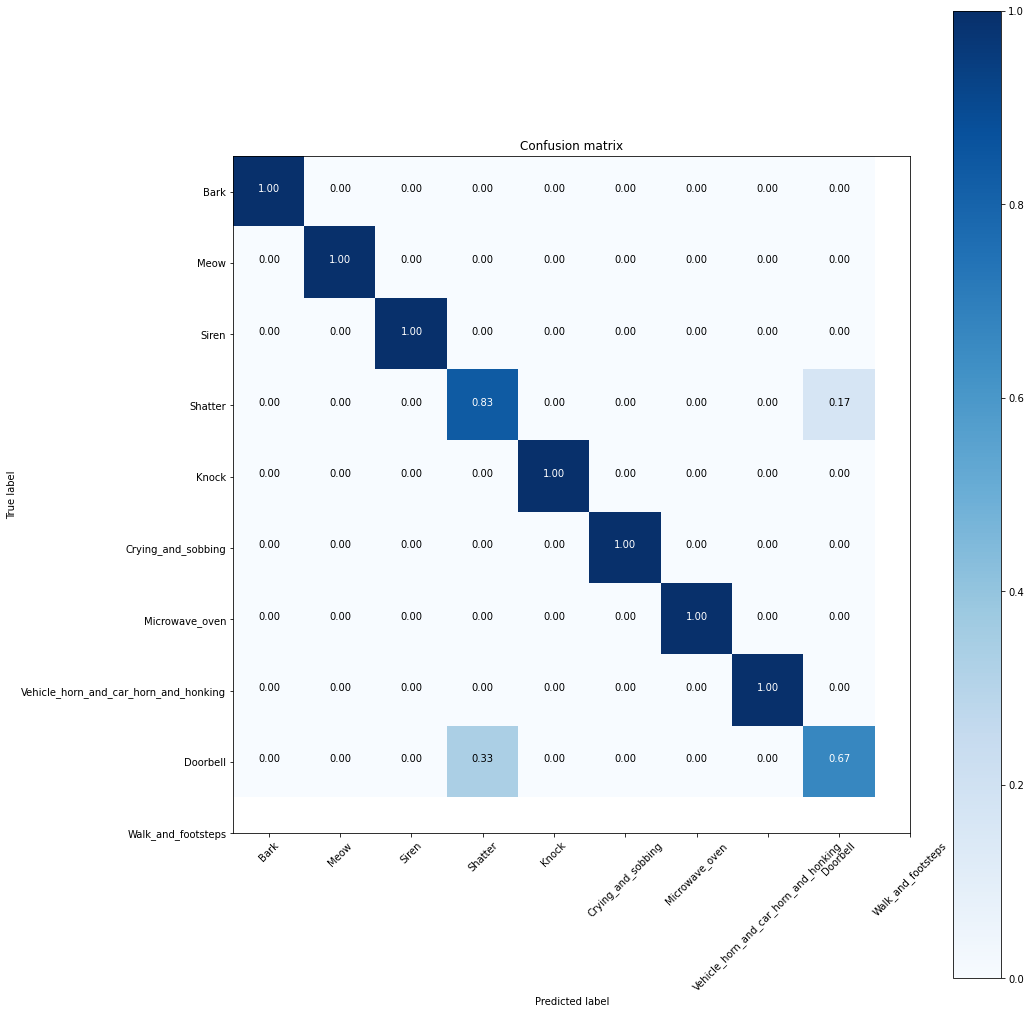

In [100]:
plot_confusion_matrix(cm, label, normalize = True)

In [ ]:
acc = accuracy_score(ytest, ypred)

In [ ]:
acc

0.115

In [ ]:
score=model.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=0)
score[1]*100

82.4999988079071

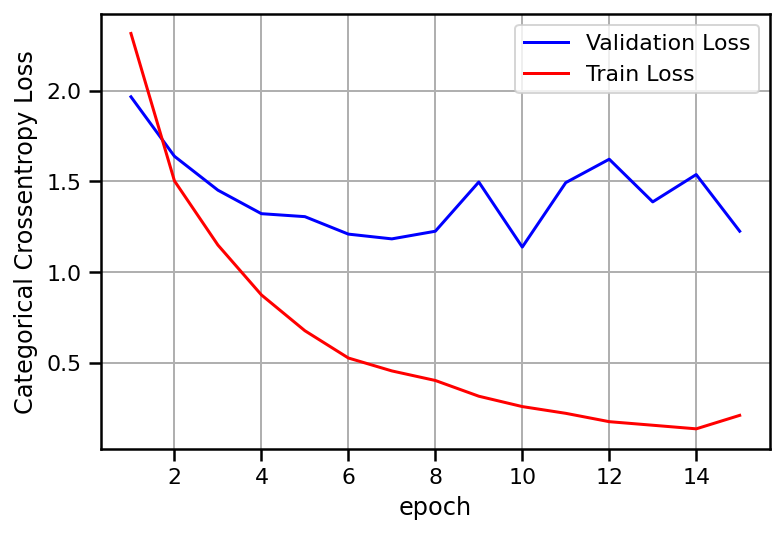

In [ ]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,15+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [ ]:
model.fit_generator(
train_it,
steps_per_epoch =600/32,
epochs=50,    
validation_data=cv_it,
validation_steps=200/32,
callbacks=callbacks_list)

Epoch 1/50
19/18 [==============================] - ETA: 0s - loss: 0.8194 - acc: 0.7350
Epoch 1: val_loss did not improve from 0.87627
18/18 [==============================] - 10s 554ms/step - loss: 0.8194 - acc: 0.7350 - val_loss: 0.9019 - val_acc: 0.7450
Epoch 2/50
19/18 [==============================] - ETA: 0s - loss: 0.7937 - acc: 0.7383
Epoch 2: val_loss did not improve from 0.87627
18/18 [==============================] - 10s 556ms/step - loss: 0.7937 - acc: 0.7383 - val_loss: 0.8974 - val_acc: 0.7300
Epoch 3/50
19/18 [==============================] - ETA: 0s - loss: 0.8424 - acc: 0.7467
Epoch 3: val_loss did not improve from 0.87627
18/18 [==============================] - 10s 556ms/step - loss: 0.8424 - acc: 0.7467 - val_loss: 0.8915 - val_acc: 0.7550
Epoch 4/50
19/18 [==============================] - ETA: 0s - loss: 0.7623 - acc: 0.7700
Epoch 4: val_loss did not improve from 0.87627
18/18 [==============================] - 10s 556ms/step - loss: 0.7623 - acc: 0.7700 - val

In [ ]:
score=model.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
score[1]*100

75.49999952316284

In [ ]:
def get_2d_conv_model():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = MaxPool2D()(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
checkpoint = ModelCheckpoint('model_deep_SGD.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks_list = [checkpoint, early]
model_deep_SGD = get_2d_conv_model()
# history = model.fit(train_it, test_it, validation_data=(cv_it, y_test), callbacks=callbacks_list, 
#                         batch_size=32, epochs=15)
# model.load_weights('best_model_batch.h5')

In [ ]:
history = model_deep_SGD.fit_generator(
train_it,
steps_per_epoch =600/32,
epochs=30,    
validation_data=cv_it,
validation_steps=200/32,
callbacks=callbacks_list)

Epoch 1/30
19/18 [==============================] - ETA: 0s - loss: 2.3103 - acc: 0.1117
Epoch 1: val_loss improved from inf to 2.29896, saving model to model_deep_SGD.h5
18/18 [==============================] - 11s 565ms/step - loss: 2.3103 - acc: 0.1117 - val_loss: 2.2990 - val_acc: 0.1050
Epoch 2/30
19/18 [==============================] - ETA: 0s - loss: 2.1941 - acc: 0.1867
Epoch 2: val_loss improved from 2.29896 to 2.29462, saving model to model_deep_SGD.h5
18/18 [==============================] - 10s 555ms/step - loss: 2.1941 - acc: 0.1867 - val_loss: 2.2946 - val_acc: 0.1000
Epoch 3/30
19/18 [==============================] - ETA: 0s - loss: 2.0997 - acc: 0.2367
Epoch 3: val_loss improved from 2.29462 to 2.28418, saving model to model_deep_SGD.h5
18/18 [==============================] - 10s 549ms/step - loss: 2.0997 - acc: 0.2367 - val_loss: 2.2842 - val_acc: 0.1550
Epoch 4/30
19/18 [==============================] - ETA: 0s - loss: 2.0003 - acc: 0.2883
Epoch 4: val_loss improv

In [ ]:
model.fit_generator(
train_it,
steps_per_epoch =600/32,
epochs=40,    
validation_data=cv_it,
validation_steps=200/32,
callbacks=callbacks_list)

Epoch 1/40
19/18 [==============================] - ETA: 0s - loss: 0.9667 - acc: 0.6950
Epoch 1: val_loss improved from 0.97811 to 0.90653, saving model to model_image_nadam.h5
18/18 [==============================] - 11s 574ms/step - loss: 0.9667 - acc: 0.6950 - val_loss: 0.9065 - val_acc: 0.7550
Epoch 2/40
19/18 [==============================] - ETA: 0s - loss: 0.9129 - acc: 0.7083
Epoch 2: val_loss did not improve from 0.90653
18/18 [==============================] - 10s 554ms/step - loss: 0.9129 - acc: 0.7083 - val_loss: 1.0968 - val_acc: 0.6550
Epoch 3/40
19/18 [==============================] - ETA: 0s - loss: 0.8421 - acc: 0.7033
Epoch 3: val_loss did not improve from 0.90653
18/18 [==============================] - 10s 553ms/step - loss: 0.8421 - acc: 0.7033 - val_loss: 0.9624 - val_acc: 0.7150
Epoch 4/40
19/18 [==============================] - ETA: 0s - loss: 0.8385 - acc: 0.7383
Epoch 4: val_loss did not improve from 0.90653
18/18 [==============================] - 10s 555

In [ ]:
score=model.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
score[1]*100

73.00000190734863

In [ ]:
score=model_nadam_wo_dropout.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
score[1]*100

82.99999833106995

In [ ]:
score=model_deep.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=3)

In [ ]:
score[1]*100

81.99999928474426

In [ ]:
!cp -r '/content/model_image_nadam_without_dropout.h5' /content/gdrive/MyDrive/MLSP/

In [ ]:
score=model_deep_SGD.evaluate_generator(test_it,steps=200/32,workers=2, use_multiprocessing=True, verbose=3)

In [ ]:
score[1]

0.7599999904632568

In [ ]:
def get_2d_conv_model():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = MaxPool2D()(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
def get_2d_conv_model_nadam():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = MaxPool2D()(x)
    
    x = Convolution2D(64, (3,3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = SpatialDropout2D(0.5)
    x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
def get_2d_conv_nadam():
    
    nclass = 10
    
    inp = Input(shape=(256,256,3))
    x = Convolution2D(16, (3,3), padding="same")(inp)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    x = Convolution2D(32, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)

    x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(pool_size = (2,2))(x)
    # x = Dropout(0.25)(x)
    
    # x = Convolution2D(64, (3,3), padding="same")(x)
    # # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = MaxPool2D()(x)
    
    # x = Convolution2D(64, (3,3), padding="same")(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    # # x = SpatialDropout2D(0.5)
    # x = AveragePooling2D()(x)

    x = Flatten()(x)
    x = Dense(128)(x)
    # x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # x = Dropout(0.25)(x)
    # x = Dense(32)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    out = Dense(10, activation= softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
# Nadam_model = '/content/model_image_nadam.h5'
model_image_nadam_without_dropout = '/content/model_image_nadam_without_dropout.h5'
SGD_deep = '/content/model_deep_SGD.h5'

# Nadam = get_2d_conv_nadam()
deep_nadam = get_2d_conv_model_nadam()
deep_sgd = get_2d_conv_model()

# Nadam.load_weights(Nadam_model)
deep_nadam.load_weights(model_image_nadam_without_dropout)
deep_sgd.load_weights(SGD_deep)

models = [deep_nadam, deep_sgd]

In [ ]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input
# from keras.optimizers import Adam
# from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os

In [ ]:
models

#Model 4: Normal Neural Network

In [11]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [12]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [13]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(128,2500,1)))
model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
# model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 128, 2500, 1)
output shape  (None, 10)


In [14]:
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam
model.compile(optimizer = Nadam(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [15]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [16]:
from sklearn.model_selection import train_test_split
X = X_train
y = Y_train
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)
# batches = gen.flow(X_train, y_train, batch_size=32)
# val_batches=gen.flow(X_val, y_val, batch_size=32)

In [17]:
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)

In [18]:
import tensorflow as tf

In [19]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
lrsche = LearningRateScheduler(scheduler)

In [20]:
checkpoint = ModelCheckpoint('dnn_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

callbacks_list = [checkpoint, lrsche]
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), callbacks=callbacks_list, 
                        batch_size=32, epochs=40)

Epoch 1/40
29/29 [==============================] - ETA: 0s - loss: 2.4649 - accuracy: 0.2133
Epoch 1: val_loss improved from inf to 6.55205, saving model to dnn_model.h5
29/29 [==============================] - 14s 413ms/step - loss: 2.4649 - accuracy: 0.2133 - val_loss: 6.5521 - val_accuracy: 0.1300 - lr: 0.0010
Epoch 2/40
29/29 [==============================] - ETA: 0s - loss: 1.9687 - accuracy: 0.3433
Epoch 2: val_loss improved from 6.55205 to 3.21094, saving model to dnn_model.h5
29/29 [==============================] - 11s 384ms/step - loss: 1.9687 - accuracy: 0.3433 - val_loss: 3.2109 - val_accuracy: 0.1300 - lr: 0.0010
Epoch 3/40
29/29 [==============================] - ETA: 0s - loss: 1.7743 - accuracy: 0.4244
Epoch 3: val_loss improved from 3.21094 to 2.12424, saving model to dnn_model.h5
29/29 [==============================] - 12s 409ms/step - loss: 1.7743 - accuracy: 0.4244 - val_loss: 2.1242 - val_accuracy: 0.2900 - lr: 0.0010
Epoch 4/40
29/29 [==========================

In [21]:
def step_decay(epoch):
	initial_lrate = 0.001
	max_iter=50
	lrate = initial_lrate*(1-epoch/max_iter)**0.5
	return lrate
lrsche = LearningRateScheduler(scheduler)

#Test Prediction

In [51]:
import tensorflow

In [79]:
path="/content/images"
test_df=pd.DataFrame()
test_df['id']=os.listdir(path)
test_generator=ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
                    dataframe=test_df,
                    directory=path,
                    x_col="id",
                    y_col=None,
                    has_ext=True,
                    class_mode=None,
                    batch_size=32,
                    seed=42,
                    shuffle=False,
                    interpolation='nearest',
                    target_size=(256,256))
m = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_image_nadam_without_dropout.h5')
y_pred = m.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
labels = (train_it.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in y_pred]
submission_df = pd.DataFrame({
            'id':test_generator.filenames,
            'label':y_pred })
submission_df['id'] = submission_df['id'].apply(lambda x: x.split('.')[0])
submission_df.to_csv('p_resultf.csv', index=False)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 201 validated image filenames.


In [80]:
key_list = list(class1.keys())
val_list = list(class1.values())
# position = [val_list.index(p) for p in values]
# key=[key_list[p] for p in position]

In [81]:
values = [key_list.index(p) for p in y_pred]

In [82]:
key_list = list(classes.keys())
val_list = list(classes.values())
position = [val_list.index(p) for p in values]
key=[key_list[p] for p in position]

In [72]:
key

['Bark',
 'Bark',
 'Vehicle_horn_and_car_horn_and_honking',
 'Bark',
 'Microwave_oven',
 'Shatter',
 'Shatter',
 'Crying_and_sobbing',
 'Shatter',
 'Microwave_oven',
 'Microwave_oven',
 'Bark',
 'Meow',
 'Meow',
 'Walk_and_footsteps',
 'Microwave_oven',
 'Bark',
 'Vehicle_horn_and_car_horn_and_honking',
 'Walk_and_footsteps',
 'Meow',
 'Meow',
 'Microwave_oven',
 'Doorbell',
 'Bark',
 'Doorbell',
 'Microwave_oven',
 'Shatter',
 'Siren',
 'Knock',
 'Meow',
 'Microwave_oven',
 'Meow',
 'Vehicle_horn_and_car_horn_and_honking',
 'Vehicle_horn_and_car_horn_and_honking',
 'Shatter',
 'Vehicle_horn_and_car_horn_and_honking',
 'Siren',
 'Siren',
 'Meow',
 'Knock',
 'Bark',
 'Bark',
 'Knock',
 'Vehicle_horn_and_car_horn_and_honking',
 'Shatter',
 'Bark',
 'Crying_and_sobbing',
 'Shatter',
 'Bark',
 'Meow',
 'Microwave_oven',
 'Bark',
 'Knock',
 'Meow',
 'Siren',
 'Vehicle_horn_and_car_horn_and_honking',
 'Knock',
 'Crying_and_sobbing',
 'Meow',
 'Crying_and_sobbing',
 'Crying_and_sobbing',
 'Ba

In [61]:
class1

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9}

In [83]:
submission_df = pd.DataFrame({
            'id':test_generator.filenames,
            'label':key })
submission_df['id'] = submission_df['id'].apply(lambda x: x.split('.')[0])
submission_df.to_csv('p_result_nadam.csv', index=False)

In [68]:
path="/content/images"
test_df=pd.DataFrame()
test_df['id']=os.listdir(path)
test_generator=ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
                    dataframe=test_df,
                    directory=path,
                    x_col="id",
                    y_col=None,
                    has_ext=True,
                    class_mode=None,
                    batch_size=32,
                    seed=42,
                    shuffle=False,
                    interpolation='nearest',
                    target_size=(256,256))
m = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_deep_SGD.h5')
y_pred = m.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
labels = (train_it.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in y_pred]
submission_df = pd.DataFrame({
            'id':test_generator.filenames,
            'label':y_pred })
submission_df['id'] = submission_df['id'].apply(lambda x: x.split('.')[0])
submission_df.to_csv('p_resultf.csv', index=False)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 201 validated image filenames.


In [74]:
path="/content/images"
test_df=pd.DataFrame()
test_df['id']=os.listdir(path)
test_generator=ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
                    dataframe=test_df,
                    directory=path,
                    x_col="id",
                    y_col=None,
                    has_ext=True,
                    class_mode=None,
                    batch_size=32,
                    seed=42,
                    shuffle=False,
                    interpolation='nearest',
                    target_size=(256,256))
m = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_adam.h5')
y_pred = m.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
labels = (train_it.class_indices)
labels = dict((v,k) for k,v in labels.items())
y_pred = [labels[k] for k in y_pred]
# submission_df = pd.DataFrame({
#             'id':test_generator.filenames,
#             'label':y_pred })
# submission_df['id'] = submission_df['id'].apply(lambda x: x.split('.')[0])
# submission_df.to_csv('p_resultf.csv', index=False)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

Found 201 validated image filenames.


#Final

In [ ]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)

In [68]:
import tensorflow

In [69]:
model_a = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_deep_SGD.h5')
model_b = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_image_nadam.h5')
model_c = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_image_nadam_without_dropout.h5')
model_d = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/MLSP/model_image_sgd.h5')

In [70]:
x_test,y_test = test_it.next()
predictions_a = model_b.predict(x_test, verbose=0)

In [72]:
x_test,y_test = test_it.next()
predictions_a = model_a.predict(x_test, verbose=0)
predictions_b = model_b.predict(x_test, verbose=0)
predictions_c = model_c.predict(x_test, verbose=0)
predictions_d = model_d.predict(x_test, verbose=0)


predictions_a = np.argmax(predictions_a, axis = 1)
predictions_b = np.argmax(predictions_b, axis = 1)
predictions_c = np.argmax(predictions_c, axis = 1)
predictions_d = np.argmax(predictions_d, axis = 1)

submissions=pd.DataFrame({"Id": list(range(1,len(predictions_a)+1)),
                         "Label": predictions_a})
submissions_b=pd.DataFrame({"Id": list(range(1,len(predictions_b)+1)),
                         "Label": predictions_b})
submissions_c=pd.DataFrame({"Id": list(range(1,len(predictions_c)+1)),
                         "Label": predictions_c})
submissions_d=pd.DataFrame({"Id": list(range(1,len(predictions_d)+1)),
                         "Label": predictions_d})
submissions.to_csv("mod1.csv", index=False, header=True)
submissions_b.to_csv("mod2.csv", index=False, header=True)
submissions.to_csv("mod3.csv", index=False, header=True)
submissions_b.to_csv("mod4.csv", index=False, header=True)

In [87]:
import pandas as pd
import numpy as np

mod1=pd.read_csv("p_result_densenet.csv")
mod2=pd.read_csv("p_result_inception.csv")
# mod3=pd.read_csv("re.csv")
mod4=pd.read_csv("p_result_nadam.csv")
# resnet=pd.read_csv("submission_InceptionResNetV2.csv")
# xception=pd.read_csv("submission_xception.csv")
df=pd.DataFrame(columns=["id","mod1","mod2","mod4"])
df["id"]=mod1["id"]
df["mod1"]=mod1["label"]
# df["resnet"]=resnet["label"]
df["mod2"]=mod2["label"]
# df["mod3"]=mod3["label"]
df["mod4"]=mod4["label"]
# df["inception_resnet"]=xception["label"]
df['majority'] = df.mode(axis=1)[0].astype(str)
vote=pd.DataFrame()
vote["id"]=df["id"]
vote["label"]=df["majority"]
print(df.tail())
vote.to_csv("majority_voting.csv",index=False)

                   id                                   mod1  \
196     MLSP_test3739                                  Siren   
197  MLSP_test2182439  Vehicle_horn_and_car_horn_and_honking   
198   MLSP_test682163                               Doorbell   
199  MLSP_test1475459                         Microwave_oven   
200  MLSP_test1362223                         Microwave_oven   

                                      mod2  \
196                         Microwave_oven   
197  Vehicle_horn_and_car_horn_and_honking   
198                               Doorbell   
199                         Microwave_oven   
200                         Microwave_oven   

                                      mod4  \
196                         Microwave_oven   
197  Vehicle_horn_and_car_horn_and_honking   
198                               Doorbell   
199                         Microwave_oven   
200                         Microwave_oven   

                                  majority  
196             

In [77]:
votes = np.array(vote['Label'])
# y_test = np.argmax(y_test, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(votes,y_test)

0.75

In [79]:
x_test, y_test = test_it.next()
ypred1 = model_a.predict(x_test)
ypred1 = np.argmax(ypred1, axis = 1)
y_test = np.argmax(y_test, axis = 1)
accuracy_score(ypred1,y_test)

0.76

In [80]:
x_test, y_test = test_it.next()
ypred1 = model_b.predict(x_test)
ypred1 = np.argmax(ypred1, axis = 1)
y_test = np.argmax(y_test, axis = 1)
accuracy_score(ypred1,y_test)

0.76

In [81]:
x_test, y_test = test_it.next()
ypred1 = model_c.predict(x_test)
ypred1 = np.argmax(ypred1, axis = 1)
y_test = np.argmax(y_test, axis = 1)
accuracy_score(ypred1,y_test)

0.87

In [82]:
x_test, y_test = test_it.next()
ypred1 = model_d.predict(x_test)
ypred1 = np.argmax(ypred1, axis = 1)
y_test = np.argmax(y_test, axis = 1)
accuracy_score(ypred1,y_test)

0.755

In [84]:
model_e = tensorflow.keras.models.load_model('/content/model_spec_adam_small (1).h5')

In [86]:
model_e.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 2500, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 128, 2500, 8)      80        
                                                                 
 activation (Activation)     (None, 128, 2500, 8)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 1250, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 1250, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 1250, 16)      1168      
                                                             